In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

In [8]:
data = pd.read_csv('data_final.csv')
features = data.columns[2:]
target = data.columns[1]
X_norm = data[features]
Y = data[target]

In [9]:
Y

0        0.2331
1        0.2082
2        0.2972
3        0.1597
4        0.2662
          ...  
19647    0.2199
19648    0.2532
19649    0.2876
19650    0.2704
19651    0.2777
Name: gap, Length: 19652, dtype: float64

In [3]:
X_norm

,A,B,mu,alpha,u0,cv,MaxAbsEStateIndex,MinEStateIndex,SPS,MolWt,...,n5Ring,n6Ring,n3HRing,n4HRing,n5HRing,n5AHRing,nFRing,GGI2,GGI3,Radius
0,0.000011,0.267676,0.061231,0.321451,0.430084,0.400147,0.836733,0.625797,0.341799,0.735764,...,0.0,0.25,0.333333,0.000000,0.00,0.00,0.0,0.279570,0.277778,0.5
1,0.000021,0.143055,0.168202,0.298744,0.569141,0.382968,0.755583,0.705087,0.159524,0.544698,...,0.0,0.00,0.000000,0.166667,0.00,0.00,0.0,0.086022,0.285714,0.5
2,0.000013,0.183527,0.201202,0.398452,0.468199,0.485807,0.832847,0.671667,0.225397,0.750875,...,0.2,0.00,0.000000,0.000000,0.25,0.25,0.0,0.182796,0.190476,0.0
3,0.000017,0.084719,0.201925,0.429405,0.427086,0.617199,0.746537,0.635563,0.268783,0.765397,...,0.0,0.00,0.000000,0.000000,0.00,0.00,0.0,0.279570,0.142857,0.5
4,0.000018,0.122704,0.117354,0.458074,0.519378,0.501084,0.307636,0.762720,0.352381,0.736411,...,0.0,0.25,0.333333,0.000000,0.00,0.00,0.0,0.096774,0.145503,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19647,0.000034,0.145336,0.183702,0.268679,0.527996,0.384069,0.298218,0.743270,0.058333,0.559220,...,0.2,0.00,0.000000,0.000000,0.25,0.00,0.0,0.086022,0.084656,0.5
19648,0.000022,0.186289,0.070935,0.404541,0.705867,0.467827,0.326195,0.676831,0.304762,0.471558,...,0.2,0.00,0.000000,0.000000,0.25,0.25,0.0,0.129032,0.216931,0.5
19649,0.000010,0.235906,0.138995,0.437016,0.563625,0.475866,0.647931,0.682339,0.421164,0.692257,...,0.2,0.00,0.000000,0.166667,0.00,0.00,0.5,0.279570,0.309524,0.0
19650,0.000020,0.114156,0.171560,0.432957,0.512579,0.534841,0.803358,0.670153,0.224339,0.706720,...,0.0,0.25,0.000000,0.000000,0.00,0.00,0.0,0.172043,0.095238,0.5


In [15]:
# Assuming X_norm is your dataframe and Y is your target series
# Step 1: Dimensionality Reduction
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_norm)

# Step 2: Clustering
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_norm)

# Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_norm)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_norm)

c:\Users\Nigel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


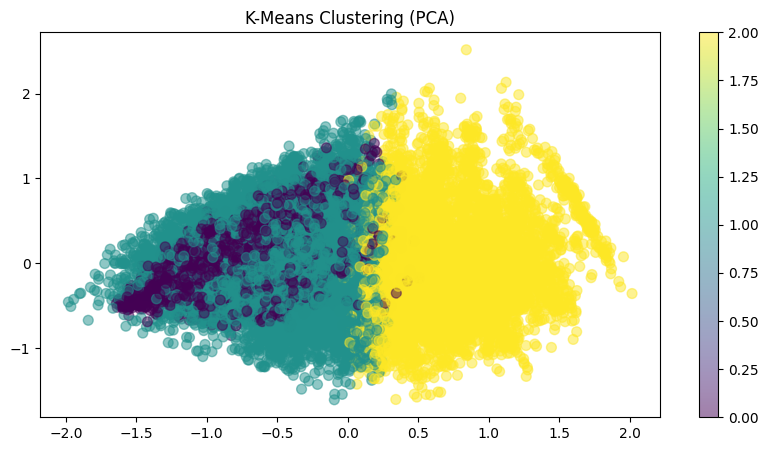

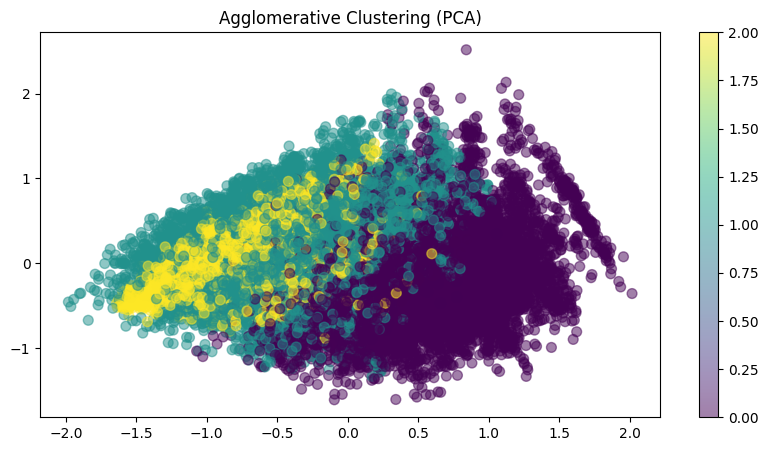

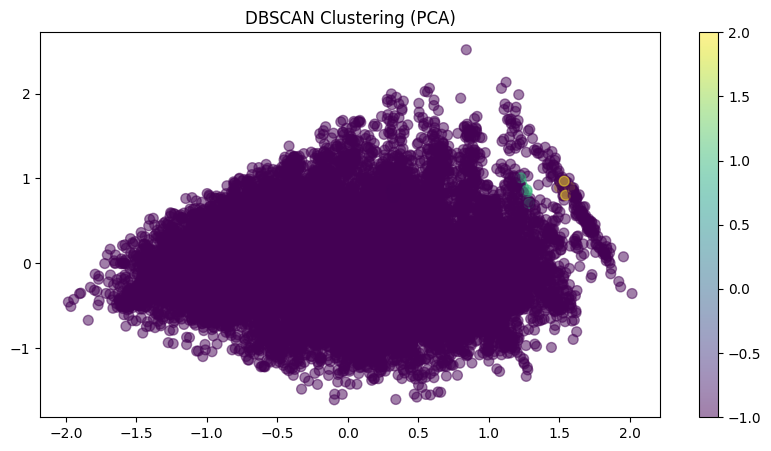

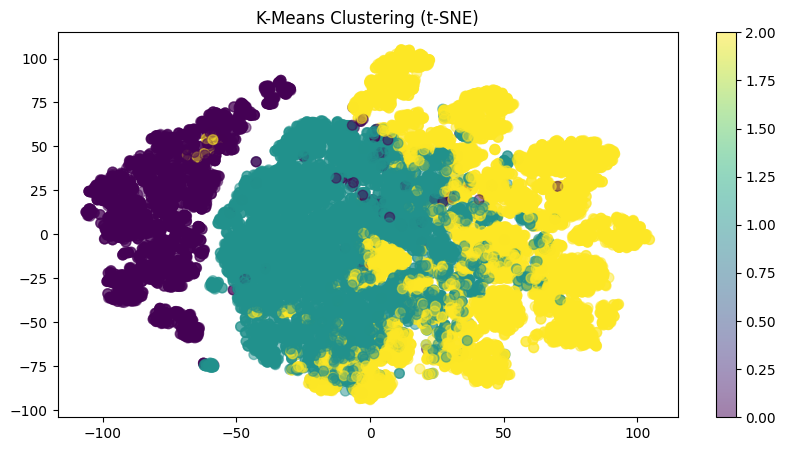

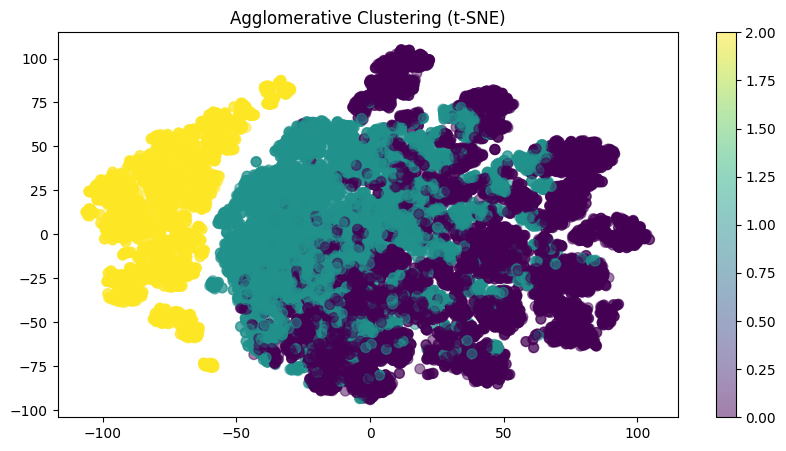

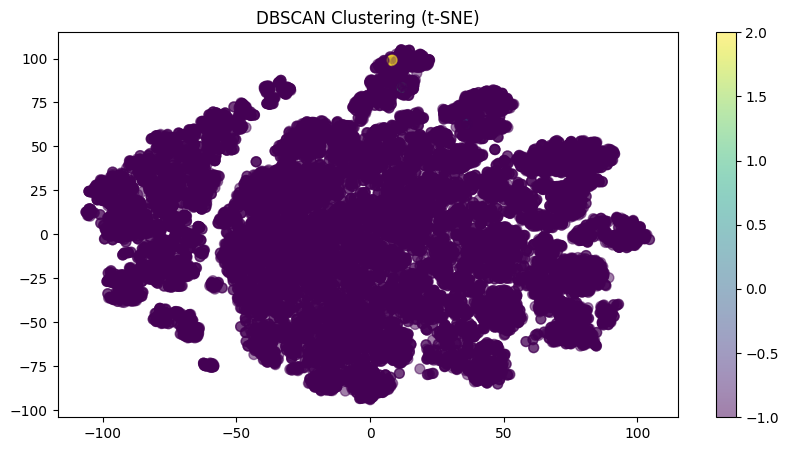

Adjusted Rand Score - K-Means: 0.00029942692443689985
Adjusted Rand Score - Agglomerative: 0.00019063551145833167
Adjusted Rand Score - DBSCAN: -9.70613707964977e-09


c:\Users\Nigel\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\Nigel\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\Nigel\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [17]:
def visualize_clusters(X, labels, title):
    plt.figure(figsize=(10, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.title(title)
    plt.colorbar()
    plt.show()

visualize_clusters(X_pca, kmeans_labels, "K-Means Clustering (PCA)")
visualize_clusters(X_pca, agg_labels, "Agglomerative Clustering (PCA)")
visualize_clusters(X_pca, dbscan_labels, "DBSCAN Clustering (PCA)")

visualize_clusters(X_tsne, kmeans_labels, "K-Means Clustering (t-SNE)")
visualize_clusters(X_tsne, agg_labels, "Agglomerative Clustering (t-SNE)")
visualize_clusters(X_tsne, dbscan_labels, "DBSCAN Clustering (t-SNE)")

# Step 4: Assessing the Quality of Clustering
print("Adjusted Rand Score - K-Means:", adjusted_rand_score(Y, kmeans_labels))
print("Adjusted Rand Score - Agglomerative:", adjusted_rand_score(Y, agg_labels))
print("Adjusted Rand Score - DBSCAN:", adjusted_rand_score(Y, dbscan_labels))